# IMPORT

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# DATA

In [2]:
df = pd.read_csv('data_lab_1.csv', sep=',')
df

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.00,3,2.70,16.0,51.0,8,False,25.00,NaN,18863.0,16028.0,482.0,755.0
1,3350000.0,40.40,1,NaN,11.0,18.6,1,False,11.00,2.0,12817.0,18603.0,NaN,NaN
2,5196000.0,56.00,2,NaN,5.0,34.3,4,False,8.30,0.0,21741.0,13933.0,90.0,574.0
3,64900000.0,159.00,3,NaN,14.0,NaN,9,False,NaN,0.0,28098.0,6800.0,84.0,234.0
4,10000000.0,100.00,2,3.03,14.0,32.0,13,False,41.00,NaN,31856.0,8098.0,112.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,3,3.70,5.0,73.3,3,False,13.83,NaN,24665.0,4232.0,796.0,381.0
23695,3100000.0,59.00,3,NaN,5.0,38.0,4,False,8.50,NaN,NaN,NaN,NaN,NaN
23696,2500000.0,56.70,2,NaN,3.0,29.7,1,False,NaN,NaN,NaN,NaN,NaN,NaN
23697,11475000.0,76.75,2,3.00,17.0,NaN,12,False,23.30,2.0,39140.0,10364.0,173.0,196.0


In [3]:

def head_tail_show(df, num_entries=2):
    return pd.concat([df.head(num_entries), df.tail(num_entries)])

head_tail_show(df)

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.00,3,2.7,16.0,51.0,8,False,25.0,NaN,18863.0,16028.0,482.0,755.0
1,3350000.0,40.40,1,NaN,11.0,18.6,1,False,11.0,2.0,12817.0,18603.0,NaN,NaN
23697,11475000.0,76.75,2,3.0,17.0,NaN,12,False,23.3,2.0,39140.0,10364.0,173.0,196.0
23698,1350000.0,32.30,1,2.5,5.0,12.3,1,False,9.0,NaN,NaN,NaN,NaN,NaN


# Проверка соответствия типов данных

In [5]:
df['floors_total'] = df['floors_total'].astype(int)

In [6]:
display(df.info())
display(head_tail_show(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              23699 non-null  float64
 1   total_area         23699 non-null  float64
 2   rooms              23699 non-null  int64  
 3   ceiling_height     23699 non-null  float64
 4   floors_total       23699 non-null  int32  
 5   living_area        23699 non-null  float64
 6   floor              23699 non-null  int64  
 7   studio             23699 non-null  bool   
 8   kitchen_area       23699 non-null  float64
 9   balcony            23699 non-null  float64
 10  airports_distance  23699 non-null  float64
 11  centers_distance   23699 non-null  float64
 12  parks_nearest      23699 non-null  float64
 13  ponds_nearest      23699 non-null  float64
dtypes: bool(1), float64(10), int32(1), int64(2)
memory usage: 2.3 MB


None

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.00,3,2.70,16,51.0,8,False,25.0,1.150082,18863.0,16028.0,482.0,755.0
1,3350000.0,40.40,1,2.65,11,18.6,1,False,11.0,2.000000,12817.0,18603.0,455.0,502.0
23697,11475000.0,76.75,2,3.00,17,30.0,12,False,23.3,2.000000,39140.0,10364.0,173.0,196.0
23698,1350000.0,32.30,1,2.50,5,12.3,1,False,9.0,1.150082,26726.0,13098.5,455.0,502.0


# Обработка пропущенных значений

In [4]:

df['floors_total'].fillna(df['floors_total'].median(), inplace=True)
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)
df['living_area'].fillna(df['living_area'].median(), inplace=True)
df['kitchen_area'].fillna(df['kitchen_area'].mean(), inplace=True)
df['balcony'].fillna(df['balcony'].mean(), inplace=True)
df['centers_distance'].fillna(df['centers_distance'].median(), inplace=True)
df['airports_distance'].fillna(df['airports_distance'].median(), inplace=True)
df['parks_nearest'].fillna(df['parks_nearest'].median(), inplace=True)
df['ponds_nearest'].fillna(df['ponds_nearest'].median(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1624\3909274336.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floors_total'].fillna(df['floors_total'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1624\3909274336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [7]:
#Считаем количество пропущенных значений
df_null = df.isnull().sum() 

print(df_null)

price                0
total_area           0
rooms                0
ceiling_height       0
floors_total         0
living_area          0
floor                0
studio               0
kitchen_area         0
balcony              0
airports_distance    0
centers_distance     0
parks_nearest        0
ponds_nearest        0
dtype: int64


In [8]:
head_tail_show(df)

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.00,3,2.70,16,51.0,8,False,25.0,1.150082,18863.0,16028.0,482.0,755.0
1,3350000.0,40.40,1,2.65,11,18.6,1,False,11.0,2.000000,12817.0,18603.0,455.0,502.0
23697,11475000.0,76.75,2,3.00,17,30.0,12,False,23.3,2.000000,39140.0,10364.0,173.0,196.0
23698,1350000.0,32.30,1,2.50,5,12.3,1,False,9.0,1.150082,26726.0,13098.5,455.0,502.0


# Обработка дубликатов

In [9]:
df_dup = df.drop_duplicates()
print(df_dup)

            price  total_area  rooms  ceiling_height  floors_total  \
0      13000000.0      108.00      3            2.70            16   
1       3350000.0       40.40      1            2.65            11   
2       5196000.0       56.00      2            2.65             5   
3      64900000.0      159.00      3            2.65            14   
4      10000000.0      100.00      2            3.03            14   
...           ...         ...    ...             ...           ...   
23694   9700000.0      133.81      3            3.70             5   
23695   3100000.0       59.00      3            2.65             5   
23696   2500000.0       56.70      2            2.65             3   
23697  11475000.0       76.75      2            3.00            17   
23698   1350000.0       32.30      1            2.50             5   

       living_area  floor  studio  kitchen_area   balcony  airports_distance  \
0             51.0      8   False     25.000000  1.150082            18863.0   

# Обработка аномальных значений и выбросов

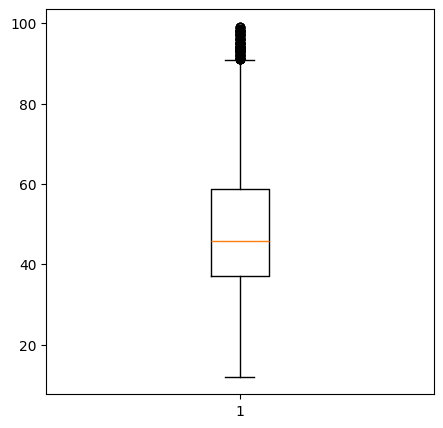

In [135]:
fig = plt.figure(figsize=(5,5))
plt.boxplot(df['total_area'])
plt.show()

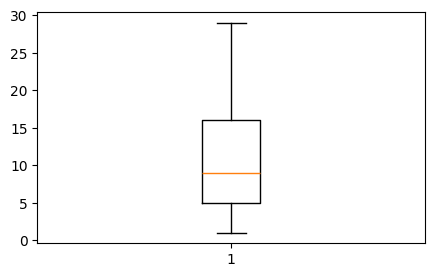

In [136]:
fig = plt.figure(figsize=(5,3))
plt.boxplot(df['floors_total'])
plt.show()

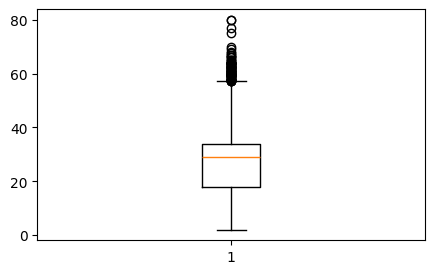

In [137]:
fig = plt.figure(figsize=(5,3))
plt.boxplot(df['living_area'])
plt.show()

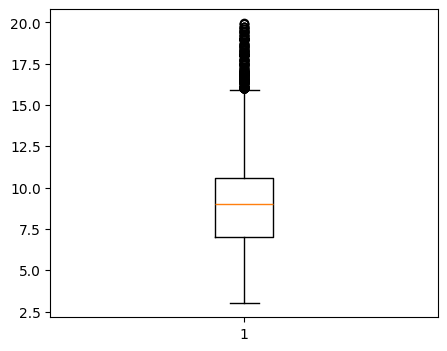

In [138]:
fig = plt.figure(figsize=(5,4))
plt.boxplot(df['kitchen_area'])
plt.show()

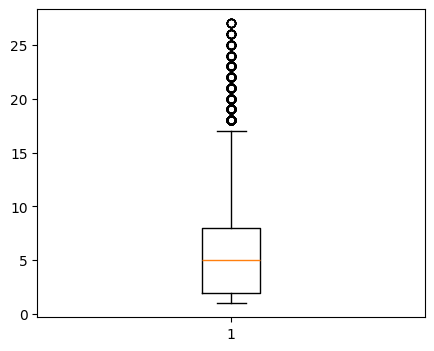

In [139]:
fig = plt.figure(figsize=(5,4))
plt.boxplot(df['floor'])
plt.show()

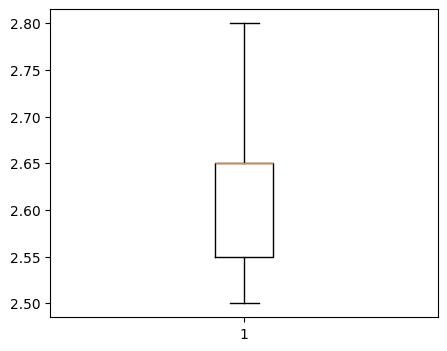

In [140]:
fig = plt.figure(figsize=(5,4))
plt.boxplot(df['ceiling_height'])
plt.show()

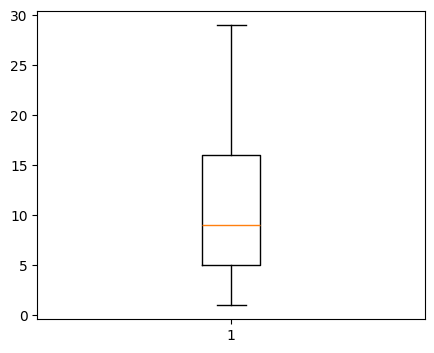

In [141]:
fig = plt.figure(figsize=(5,4))
plt.boxplot(df['floors_total'])
plt.show()

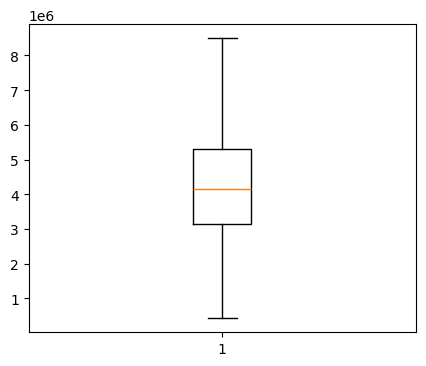

In [143]:
fig = plt.figure(figsize=(5,4))
plt.boxplot(df['price'])
plt.show()

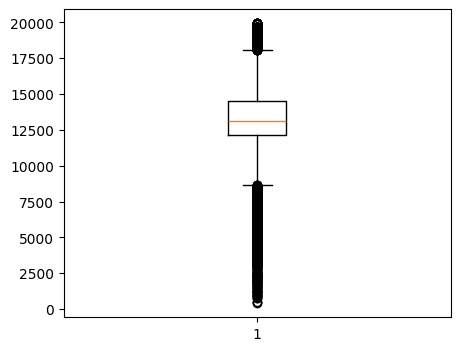

In [170]:
fig = plt.figure(figsize=(5,4))
plt.boxplot(df['centers_distance'])
plt.show()

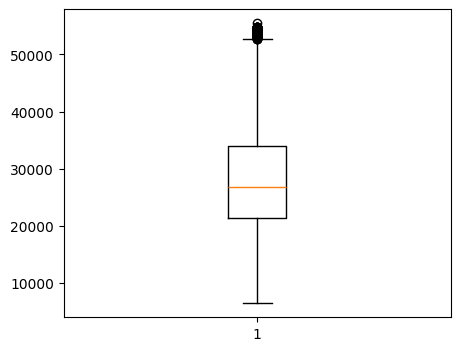

In [124]:
fig = plt.figure(figsize=(5,4))
plt.boxplot(df['airports_distance'])
plt.show()

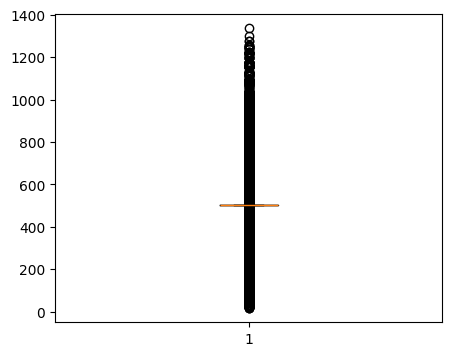

In [146]:
fig = plt.figure(figsize=(5,4))
plt.boxplot(df['ponds_nearest'])
plt.show()

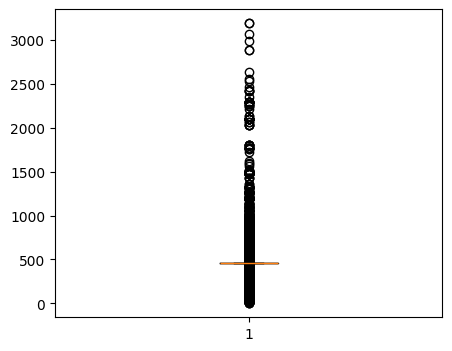

In [148]:
fig = plt.figure(figsize=(5,4))
plt.boxplot(df['parks_nearest'])
plt.show()

In [10]:
#Удаляем квартиры с высотой потолка более 3 метров
def more_3(df):
    df = df[df['ceiling_height'] > 2.8] 
    return df
more_3(df).count()

df.drop(more_3(df).index, inplace=True)
more_3(df).count()
#df.drop(columns=, inplace=True)

#display(df['ceiling_height'].max())
#display(df['ceiling_height'].min())

price                0
total_area           0
rooms                0
ceiling_height       0
floors_total         0
living_area          0
floor                0
studio               0
kitchen_area         0
balcony              0
airports_distance    0
centers_distance     0
parks_nearest        0
ponds_nearest        0
dtype: int64

In [133]:
def less_3(df):
    df = df[df['ceiling_height'] < 2.5] 
    return df
less_3(df).count()

df.drop(less_3(df).index, inplace=True)
less_3(df).count()

price                0
total_area           0
rooms                0
ceiling_height       0
floors_total         0
living_area          0
floor                0
studio               0
kitchen_area         0
balcony              0
airports_distance    0
centers_distance     0
parks_nearest        0
ponds_nearest        0
dtype: int64

In [ ]:
#Удаляем квартиры далеко от центра
def far(df):
    df = df[df['centers_distance'] >= 20000] 
    return df
far(df).count()

df.drop(far(df).index, inplace=True)

far(df).count()

price                0
total_area           0
rooms                0
ceiling_height       0
floors_total         0
living_area          0
floor                0
studio               0
kitchen_area         0
balcony              0
airports_distance    0
centers_distance     0
parks_nearest        0
ponds_nearest        0
dtype: int64

In [121]:
def price(df):
    df = df[df['price'] >= 8500000] 
    return df
price(df).count()

df.drop(price(df).index, inplace=True)

price(df).count()

price                0
total_area           0
rooms                0
ceiling_height       0
floors_total         0
living_area          0
floor                0
studio               0
kitchen_area         0
balcony              0
airports_distance    0
centers_distance     0
parks_nearest        0
ponds_nearest        0
dtype: int64

In [520]:
#Удаляем квартиры далеко от аэропортов
def far(df):
    df = df[df['airports_distance'] >= 45500] & df[df['airports_distance'] <= 20000]
    return df
far(df).count()

df.drop(far(df).index, inplace=True)

far(df).count()

price                0
total_area           0
rooms                0
ceiling_height       0
floors_total         0
living_area          0
floor                0
studio               0
kitchen_area         0
balcony              0
airports_distance    0
centers_distance     0
parks_nearest        0
ponds_nearest        0
high_rise            0
area_type            0
dtype: int64

In [193]:
display(df['total_area'].min())
display(df['total_area'].max())

12.0

900.0

In [28]:
display(df['floor'].min())
display(df['floor'].max())

1

33

In [20]:
#Удаляем квартиры с пплощадью более 600 метров
def more_600(df):
    df = df[df['total_area'] >= 100]
    return df
more_600(df).count()
df.drop(more_600(df).index, inplace=True)
more_600(df).count()

price                0
total_area           0
rooms                0
ceiling_height       0
floors_total         0
living_area          0
floor                0
studio               0
kitchen_area         0
balcony              0
airports_distance    0
centers_distance     0
parks_nearest        0
ponds_nearest        0
dtype: int64

In [378]:
#Удаляем квартиры в домах выше 32 этажей
def living_area_clean(df):
    df = df[df['living_area'] >= 62]
    return df
living_area_clean(df).count()
df.drop(living_area_clean(df).index, inplace=True)
living_area_clean(df).count()


price                0
total_area           0
rooms                0
ceiling_height       0
floors_total         0
living_area          0
floor                0
studio               0
kitchen_area         0
balcony              0
airports_distance    0
centers_distance     0
parks_nearest        0
ponds_nearest        0
high_rise            0
area_type            0
dtype: int64

In [134]:
#Удаляем квартиры в домах выше 32 этажей
def living_area_clean(df):
    df = df[df['kitchen_area'] >= 20] & df[df['kitchen_area'] <= 2.5]
    return df
living_area_clean(df).count()
df.drop(living_area_clean(df).index, inplace=True)
living_area_clean(df).count()


price                0
total_area           0
rooms                0
ceiling_height       0
floors_total         0
living_area          0
floor                0
studio               0
kitchen_area         0
balcony              0
airports_distance    0
centers_distance     0
parks_nearest        0
ponds_nearest        0
dtype: int64

In [31]:
#Удаляем квартиры в домах выше 32 этажей
def more_35(df):
    df = df[df['floors_total'] >= 30] 
    return df
more_35(df).count()
df.drop(more_35(df).index, inplace=True)
more_35(df).count()


price                0
total_area           0
rooms                0
ceiling_height       0
floors_total         0
living_area          0
floor                0
studio               0
kitchen_area         0
balcony              0
airports_distance    0
centers_distance     0
parks_nearest        0
ponds_nearest        0
dtype: int64

In [149]:
#кодируем категориальные признаки
def encode_with_nan(df, column):
    le = LabelEncoder()
    mask = df[column].notna()
    df.loc[mask, column] = le.fit_transform(df.loc[mask, column])
    return le


encode_with_nan(df, 'floors_total')
df

C:\Users\Dell\AppData\Local\Temp\ipykernel_1624\3699250243.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[10  4 11 ...  4  2  4]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[mask, column] = le.fit_transform(df.loc[mask, column])


,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
1,3350000.0,40.4,1,2.65,10,18.6,1,False,11.000000,2.000000,12817.0,18603.0,455.0,502.0
2,5196000.0,56.0,2,2.65,4,34.3,4,False,8.300000,0.000000,21741.0,13933.0,90.0,574.0
5,2890000.0,30.4,1,2.65,11,14.4,5,False,9.100000,1.150082,26726.0,13098.5,455.0,502.0
6,3700000.0,37.3,1,2.65,25,10.6,6,False,14.400000,1.000000,52996.0,19143.0,455.0,502.0
7,7915000.0,71.6,2,2.65,23,30.0,22,False,18.900000,2.000000,23982.0,11634.0,455.0,502.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,5500000.0,52.0,2,2.65,4,31.0,2,False,6.000000,1.150082,20151.0,6263.0,300.0,502.0
23692,1350000.0,30.0,1,2.65,4,17.5,4,False,6.000000,1.150082,26726.0,13098.5,455.0,502.0
23695,3100000.0,59.0,3,2.65,4,38.0,4,False,8.500000,1.150082,26726.0,13098.5,455.0,502.0
23696,2500000.0,56.7,2,2.65,2,29.7,1,False,10.569807,1.150082,26726.0,13098.5,455.0,502.0


Убрал выбросы по цене 

# Добавить новые признаки

In [171]:
# Добавим признак отношения дома к высоткам
df['high_rise'] = df['floors_total'] > 20
df['center'] = df['centers_distance'] < 15000
df['one_meter_price'] = df['price'] / df['total_area']

df.head()

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest,high_rise,center,one_meter_price
1,3350000.0,40.4,1,2.65,10,18.6,1,False,11.0,2.000000,12817.0,18603.0,455.0,502.0,False,False,82920.792079
2,5196000.0,56.0,2,2.65,4,34.3,4,False,8.3,0.000000,21741.0,13933.0,90.0,574.0,False,True,92785.714286
5,2890000.0,30.4,1,2.65,11,14.4,5,False,9.1,1.150082,26726.0,13098.5,455.0,502.0,False,True,95065.789474
6,3700000.0,37.3,1,2.65,25,10.6,6,False,14.4,1.000000,52996.0,19143.0,455.0,502.0,True,False,99195.710456
7,7915000.0,71.6,2,2.65,23,30.0,22,False,18.9,2.000000,23982.0,11634.0,455.0,502.0,True,True,110544.692737


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15703 entries, 1 to 23698
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              15703 non-null  float64
 1   total_area         15703 non-null  float64
 2   rooms              15703 non-null  int64  
 3   ceiling_height     15703 non-null  float64
 4   floors_total       15703 non-null  int64  
 5   living_area        15703 non-null  float64
 6   floor              15703 non-null  int64  
 7   studio             15703 non-null  bool   
 8   kitchen_area       15703 non-null  float64
 9   balcony            15703 non-null  float64
 10  airports_distance  15703 non-null  float64
 11  centers_distance   15703 non-null  float64
 12  parks_nearest      15703 non-null  float64
 13  ponds_nearest      15703 non-null  float64
 14  high_rise          15703 non-null  bool   
 15  center             15703 non-null  bool   
 16  one_meter_price    15703 no

# Оценка влияния признаков на стоимость квартиры

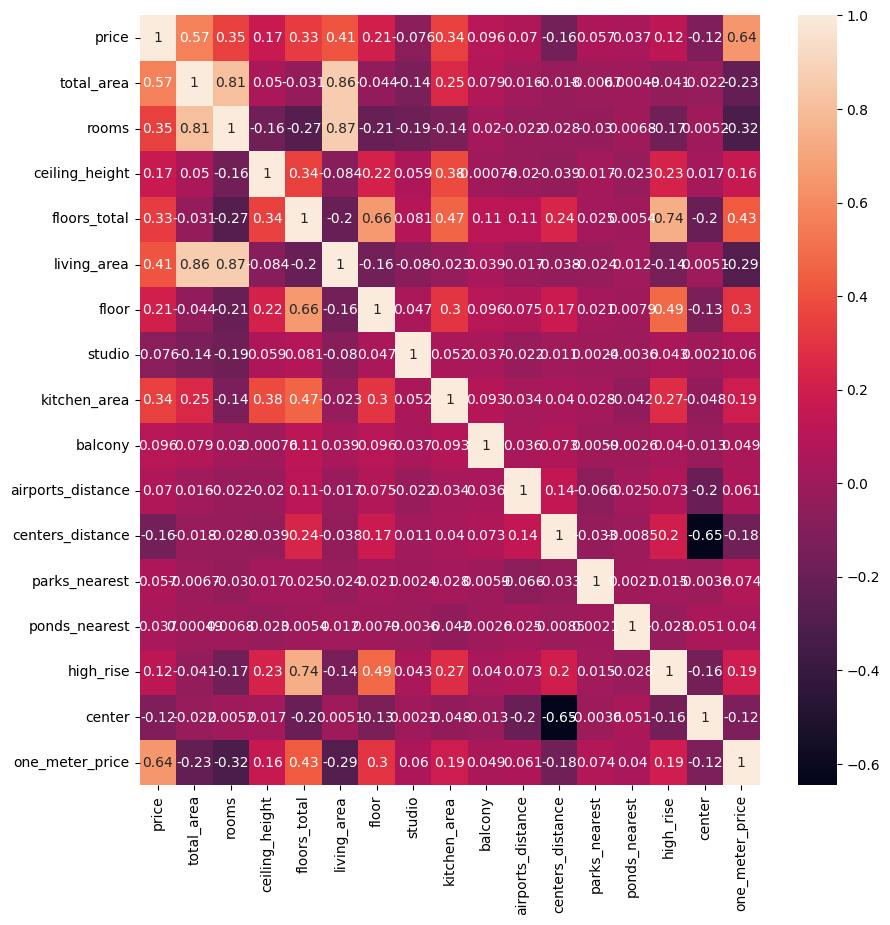

In [172]:
#Строим коллеляцию Пирсона для определения влияния признаков на цену
df_corr = df.corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True)
plt.show()

С ценой взаимосвязаны следующие параметры: total_area, rooms, ceiling_height, floors_total, living_area, kitchen_area, floor 

В итоге оказалось, что на увеличение цены влияют параметры 